In [8]:
import pwd
import pytorch_lightning as pl
import torch
import torchvision
from torch.utils.data import random_split, DataLoader, Dataset
import numpy as np
import os
import scipy.io
import sys
import matplotlib.pyplot as plt
!pwd

/mnt/ssd/jj/Research/cauMedical/lightning_bolts/module


### About sequence

(80100, 1000)


/mnt/ssd/jj/anaconda3/envs/agpu_env/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


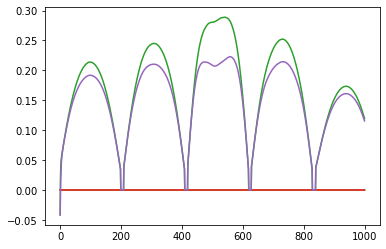

In [16]:
MRFData = scipy.io.loadmat('../Bloch_decoder/data/Pingfan/D_LUT_L1000_TE10_Start1_Train.mat')
data = MRFData['D']
label = MRFData['LUT']
print(data.shape)
plt.plot(data[:5].T)

### About label (T1, T2)

1.0 4991.0
1.0 1991.0


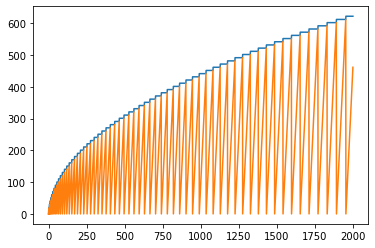

In [41]:
# About label
print(min(label[:,0]), max(label[:,0]))
print(min(label[:,1]), max(label[:,1]))
plt.plot(label[:2000, 0])
plt.plot(label[:2000, 1])

1.0 2491.0
1.0 991.0


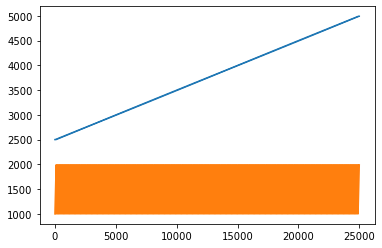

In [64]:
T1 = label[:,0]
T2 = label[:,1]
condition = (T1<2500)&(T2<1000)
tr = label[condition]
te = label[(T1>2500)&(T2>1000)]
plt.plot(te)
print(min(tr[:,0]), max(tr[:,0]))
print(min(tr[:,1]), max(tr[:,1]))

In [54]:

print(label[label[:,0]<10], label[:,1]<10])

[[ 1.  1.]
 [11.  1.]
 [11. 11.]
 [21.  1.]
 [21. 11.]
 [21. 21.]
 [31.  1.]
 [31. 11.]
 [31. 21.]
 [31. 31.]]


27 73


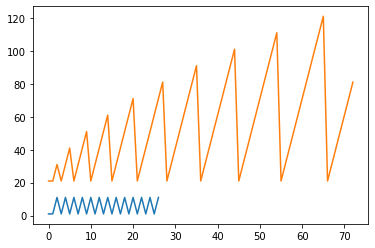

In [52]:
a = label[:100, 1]
# plt.plot(a)
print(len(a[(a<20)]), len(a[(a>20)]))
plt.plot(a[(a<20)])
plt.plot(a[(a>20)])